## Phase 1 Project Submission

Please fill out:
* Student name: Matt LeGro
* Student pace: self paced / part time / (full time)
* Scheduled project review date/time: 
* Instructor name: Abhineet (Reviewing Instructor: )


In [1]:
import os
import pandas as pd
import numpy as np
import tmdbsimple as tmdb
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import ast

Let's load in our super dataframe!

In [2]:
movie_collection = pd.read_csv('./dataFiles/movie_collection.csv')

In [3]:
movie_collection.head(2)

,tconst,Title,Genres,runtime_minutes,vote_average,vote_count,budget_est,worldwide_gross,release_week_day,release_day,release_month,release_year
0,tt0892769,How to Train Your Dragon,"['Fantasy', 'Adventure', 'Animation', 'Family']",98,8.095082,618909,165000000.0,494874875.5,4,26,3,2010
1,tt1228705,Iron Man 2,"['Adventure', 'Action', 'Science Fiction']",124,6.996308,670058,185000000.0,622544860.0,4,7,5,2010


In [5]:
movie_collection.columns

Index(['tconst', 'Title', 'Genres', 'runtime_minutes', 'vote_average',
       'vote_count', 'budget_est', 'worldwide_gross', 'release_week_day',
       'release_day', 'release_month', 'release_year'],
      dtype='object')

In [6]:
movie_collection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2373 entries, 0 to 2372
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tconst            2373 non-null   object 
 1   Title             2373 non-null   object 
 2   Genres            2373 non-null   object 
 3   runtime_minutes   2373 non-null   int64  
 4   vote_average      2373 non-null   float64
 5   vote_count        2373 non-null   int64  
 6   budget_est        2373 non-null   float64
 7   worldwide_gross   2373 non-null   float64
 8   release_week_day  2373 non-null   int64  
 9   release_day       2373 non-null   int64  
 10  release_month     2373 non-null   int64  
 11  release_year      2373 non-null   int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 222.6+ KB


In [7]:
movie_collection.describe()

,runtime_minutes,vote_average,vote_count,budget_est,worldwide_gross,release_week_day,release_day,release_month,release_year
count,2373.000000,2373.000000,2.373000e+03,2.373000e+03,2.373000e+03,2373.000000,2373.000000,2373.000000,2373.000000
mean,108.500211,6.382529,7.379590e+04,3.580101e+07,1.128888e+08,3.637590,15.781290,6.933418,2013.137800
std,20.781843,1.031946,1.438744e+05,4.941197e+07,2.176952e+08,0.982633,8.631179,3.421209,5.687845
min,0.000000,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,0.000000,1.000000,1.000000,1930.000000
25%,95.000000,5.800000,3.280000e+02,5.400000e+06,4.423508e+06,4.000000,9.000000,4.000000,2011.000000
50%,106.000000,6.400000,8.665000e+03,1.700000e+07,3.029494e+07,4.000000,16.000000,7.000000,2014.000000
75%,119.000000,7.093148,8.690500e+04,4.000000e+07,1.146292e+08,4.000000,23.000000,10.000000,2016.000000
max,339.000000,10.000000,1.863252e+06,3.953000e+08,2.787965e+09,6.000000,31.000000,12.000000,2019.000000


Okay, from here I am seeing: movies tend to be released more during the later months, we don't have data for years after 2019, there may be a record with one vote for a rating of zero. Similarly there is a movie with a budget of 1 dollar. Release day throughout the month seems fairly evenly distributed.

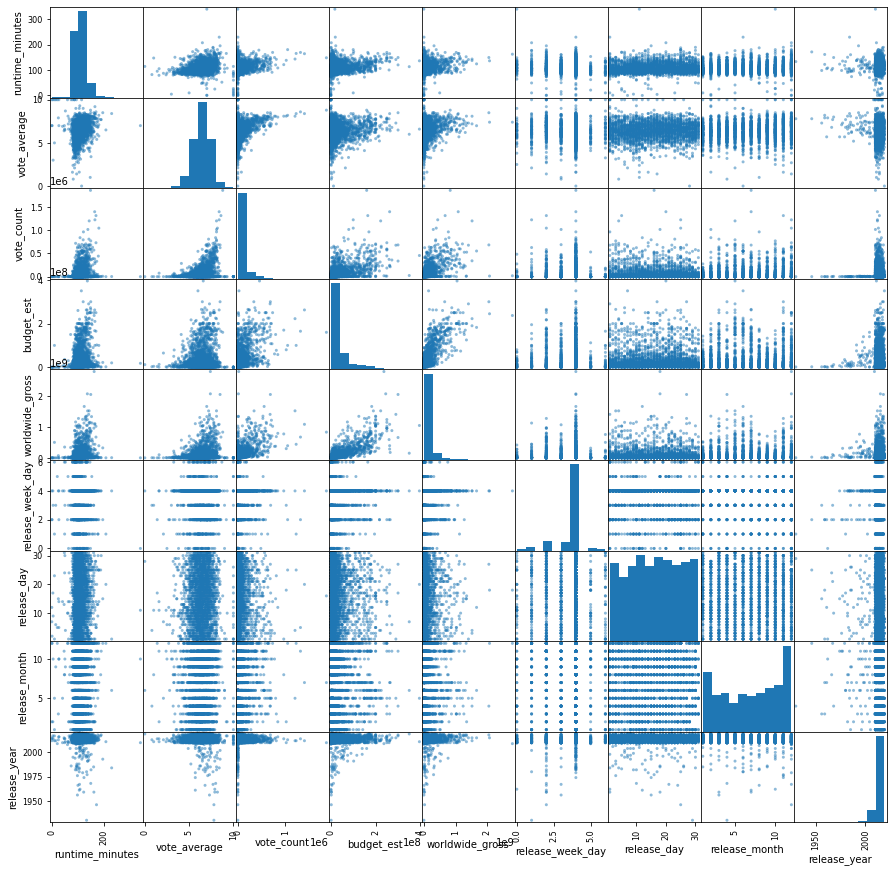

In [8]:
pd.plotting.scatter_matrix(movie_collection,figsize =(15,15));

Noteable Features: Most of the data is from after 2000, maybe even after 2010, depending on the binning here. Worlwide Gross seems to track slightly with budget, which is reasonable. Same with vote_average, though it is hard to quantify how you're movie will get voted on before it is released. Of course there may be some indirect relationships we can make. Slight improvements on vote_average with increasing movie length, for example. There may be something of a rightward skew with respect to worldwide_gross and runtime as well, but it could be because with increased runtime comes increased budget and increased gross. Another interesting feature is that there are obvious months and days on which high-grossing movies are not released, though based on voter ratings, these movies aren't necessarily worse than their counterparts. Let's quickly add a ROI column to see if there are better defined relationships there.

In [9]:
movie_collection['ROI_percent'] = (
    movie_collection.worldwide_gross - movie_collection.budget_est) / movie_collection.budget_est * 100

In [10]:
movie_collection.head()

,tconst,Title,Genres,runtime_minutes,vote_average,vote_count,budget_est,worldwide_gross,release_week_day,release_day,release_month,release_year,ROI_percent
0,tt0892769,How to Train Your Dragon,"['Fantasy', 'Adventure', 'Animation', 'Family']",98,8.095082,618909,165000000.0,4.948749e+08,4,26,3,2010,199.924167
1,tt1228705,Iron Man 2,"['Adventure', 'Action', 'Science Fiction']",124,6.996308,670058,185000000.0,6.225449e+08,4,7,5,2010,236.510735
2,tt1375666,Inception,"['Action', 'Science Fiction', 'Adventure']",148,8.794046,1863252,160000000.0,8.305287e+08,4,16,7,2010,419.080439
3,tt0814255,Percy Jackson & the Olympians: The Lightning T...,"['Adventure', 'Fantasy', 'Family']",118,5.904995,169337,95000000.0,2.247740e+08,3,11,2,2010,136.604254
4,tt0435761,Toy Story 3,"['Animation', 'Family', 'Comedy']",103,8.292754,690558,200000000.0,1.067925e+09,3,17,6,2010,433.962306


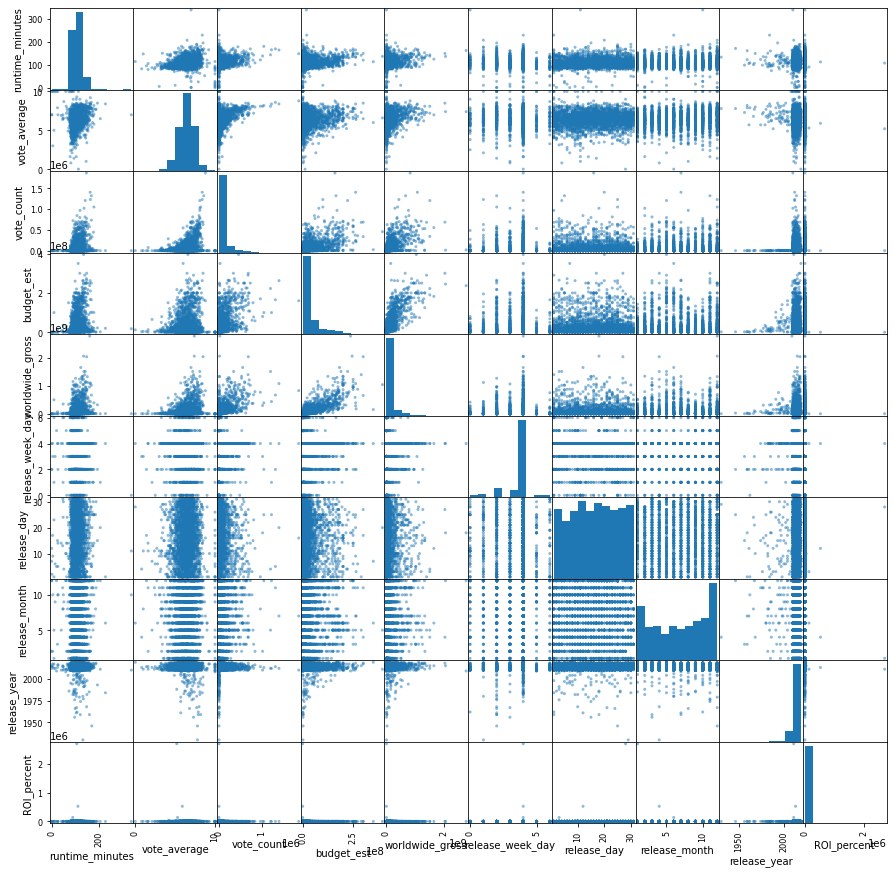

In [11]:
pd.plotting.scatter_matrix(movie_collection,figsize =(15,15));

Okay, there are some ROI outliers obscuring the data, lets see what they are.

In [12]:
movie_collection.sort_values(by='ROI_percent', ascending = False).head(50)

,tconst,Title,Genres,runtime_minutes,vote_average,vote_count,budget_est,worldwide_gross,release_week_day,release_day,release_month,release_year,ROI_percent
1316,tt0893412,From Prada to Nada,"['Comedy', 'Drama', 'Romance']",107,5.200000,163,93.0,2500000.0,4,28,1,2011,2.688072e+06
1502,tt1595656,To the Wonder,"['Drama', 'Romance']",112,5.900000,266,112.0,587615.0,4,12,4,2013,5.245562e+05
1337,tt1436559,"Love, Wedding, Marriage","['Comedy', 'Romance']",90,5.300000,117,1.0,1378.0,4,3,6,2011,1.377000e+05
750,tt2309260,The Gallows,"['Horror', 'Thriller']",84,4.219320,18354,100000.0,42160442.0,4,10,7,2015,4.206044e+04
1466,tt2389344,The Mistress,"['Romance', 'Drama']",125,6.400000,7,22361.0,5876918.0,4,21,9,2012,2.618200e+04
1594,tt2133234,Haunted,['Horror'],93,5.100000,5,5000.0,750000.0,6,31,3,2013,1.490000e+04
2128,tt7961060,Dragon Ball Super: Broly,"['Action', 'Animation', 'Fantasy', 'Adventure'...",101,7.400000,721,1000000.0,125002821.0,2,16,1,2019,1.240028e+04
394,tt1560985,The Devil Inside,"['Thriller', 'Horror']",83,4.206492,33963,1000000.0,101758990.0,4,6,1,2012,1.007590e+04
1193,tt1584016,Catfish,['Documentary'],87,6.800000,284,30000.0,3045943.0,4,17,9,2010,1.005314e+04
1565,tt2459022,Lost in Thailand,"['Comedy', 'Adventure', 'Drama']",105,6.500000,36,2200000.0,208000000.0,1,5,2,2013,9.354545e+03


Looking at the top 50 best performing by ROI percent, there are mostly legitimate movies / data, which is encouraging. The top three are definitely bad values; a quick google search can verify that. We'll have to do some plotting while excluding outliers or using specific budget ranges. Since I know there are some bad actors in this head, I'll remove them. 

In [13]:
remove_tconsts = ['tt0893412','tt1595656','tt1436559']
remove_indexes = movie_collection[ movie_collection['tconst'].isin(remove_tconsts)].index
movie_collection = movie_collection.drop(remove_indexes)
movie_collection = movie_collection.reset_index()
movie_collection = movie_collection.drop(columns = 'index')
movie_collection.sort_values(by='ROI_percent', ascending = False).head(50)

,tconst,Title,Genres,runtime_minutes,vote_average,vote_count,budget_est,worldwide_gross,release_week_day,release_day,release_month,release_year,ROI_percent
750,tt2309260,The Gallows,"['Horror', 'Thriller']",84,4.219320,18354,100000.0,42160442.0,4,10,7,2015,42060.442000
1464,tt2389344,The Mistress,"['Romance', 'Drama']",125,6.400000,7,22361.0,5876918.0,4,21,9,2012,26181.999911
1591,tt2133234,Haunted,['Horror'],93,5.100000,5,5000.0,750000.0,6,31,3,2013,14900.000000
2125,tt7961060,Dragon Ball Super: Broly,"['Action', 'Animation', 'Fantasy', 'Adventure'...",101,7.400000,721,1000000.0,125002821.0,2,16,1,2019,12400.282100
394,tt1560985,The Devil Inside,"['Thriller', 'Horror']",83,4.206492,33963,1000000.0,101758990.0,4,6,1,2012,10075.899000
1193,tt1584016,Catfish,['Documentary'],87,6.800000,284,30000.0,3045943.0,4,17,9,2010,10053.143333
1562,tt2459022,Lost in Thailand,"['Comedy', 'Adventure', 'Drama']",105,6.500000,36,2200000.0,208000000.0,1,5,2,2013,9354.545455
1661,tt2235779,The Quiet Ones,['Horror'],98,5.000000,398,200000.0,17834867.0,4,25,4,2014,8817.433500
1595,tt0387564,Saw,"['Horror', 'Mystery', 'Crime']",103,7.400000,4795,1200000.0,103911669.0,4,29,10,2004,8559.305750
1703,tt3001638,Mary Kom,"['Action', 'Drama', 'History']",122,7.200000,49,224056.0,15536328.0,5,8,11,2014,6834.127182


A lot of these will still be outliers, but it getting rid of those obviously wrong ones was good.

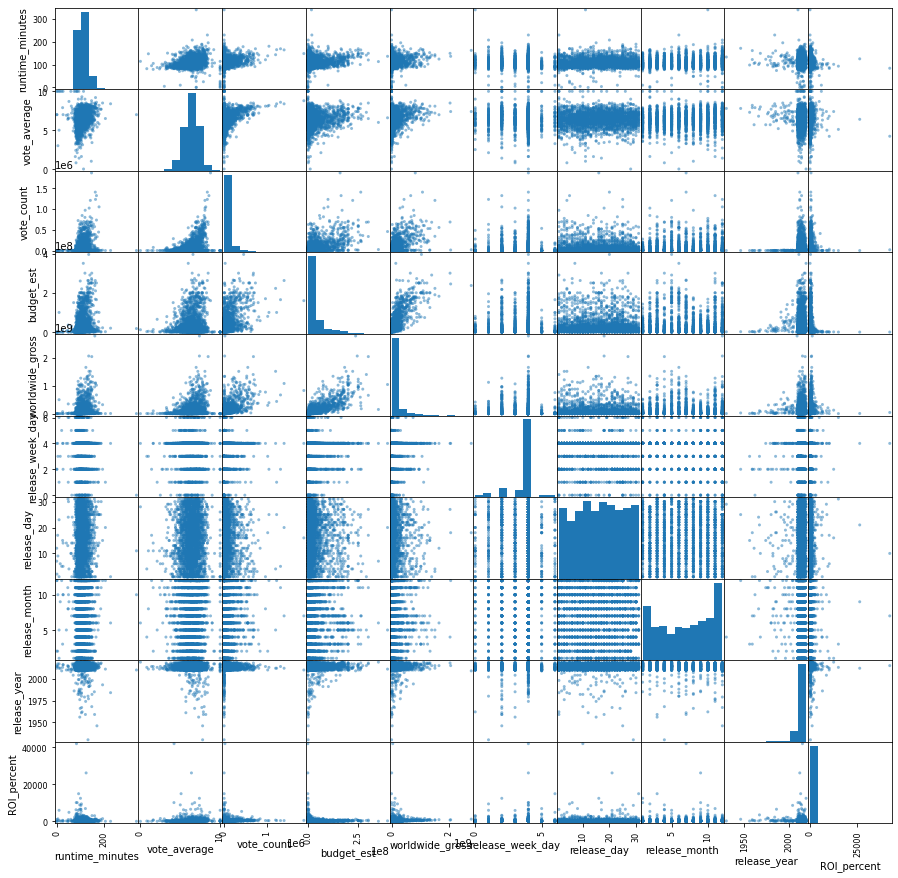

In [14]:
pd.plotting.scatter_matrix(movie_collection,figsize =(15,15));

It isn't immediately obvious how I could use the Genres column as is, so let's implement what we did in the study group and make a boolean column for each unique genre in our collection.

In [15]:
all_genres = set()
for genres in movie_collection['Genres']:
    all_genres.update(ast.literal_eval(genres))

In [16]:
all_genres

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Science Fiction',
 'Sport',
 'TV Movie',
 'Thriller',
 'War',
 'Western'}

In [17]:
for genre in all_genres:
    movie_collection[genre] = np.zeros(shape=movie_collection.shape[0])
for index, row in movie_collection.iterrows():
    for genre in ast.literal_eval(row['Genres']):
        movie_collection.loc[index, genre] = 1

In [18]:
genre_count = {}
for col in movie_collection.loc[:,movie_collection.columns.isin(all_genres)].columns:
    count = (movie_collection[col]).sum()
    genre_count.update( {col:count})

In [19]:
genre_count

{'Crime': 322.0,
 'Mystery': 188.0,
 'Animation': 165.0,
 'Music': 68.0,
 'Action': 624.0,
 'Biography': 20.0,
 'Sci-Fi': 12.0,
 'Documentary': 55.0,
 'Horror': 260.0,
 'Family': 236.0,
 'Romance': 353.0,
 'Drama': 1160.0,
 'History': 110.0,
 'TV Movie': 2.0,
 'Science Fiction': 240.0,
 'Musical': 4.0,
 'Comedy': 775.0,
 'Thriller': 608.0,
 'Sport': 12.0,
 'Adventure': 404.0,
 'War': 79.0,
 'Fantasy': 242.0,
 'Western': 26.0}

Okay, there are a few equivalent genres. In our mapping to a primary_genre next, we take care of this. I would like to establish a primary genre for each movie to be able to more easily group by genre. I will accomplish this by choosing, from the list of genres for each movie, the genre that is the most common as an identifier. Therefore, with the four most common genre designations as ['Action','Comedy','Drama','Thriller'], all movies will be mapped to one of those. If they have one or more in the list, it chooses the one with the highest total count of movies of that genre in the dataset. If it does not have any of those, it will be mapped to one using the following dictionary:

general_genre_dict = {'Adventure':'Action',
                     'Horror':'Thriller',
                     'Romance':'Drama',
                     'Fantasy':'Action',
                     'Animation':'Comedy',
                     'Documentary':'Drama',
                     'Family':'Comedy',
                     'Musical':'Drama',
                     'History':'Drama',
                     'Music':'Drama',
                     'Crime':'Thriller',
                     'Western':'Action', 
                     'Sci-Fi':'Action',
                     'Science Fiction':'Action'}

In [20]:
movie_collection.loc[movie_collection.Genres == '[]']

,tconst,Title,Genres,runtime_minutes,vote_average,vote_count,budget_est,worldwide_gross,release_week_day,release_day,...,TV Movie,Science Fiction,Musical,Comedy,Thriller,Sport,Adventure,War,Fantasy,Western
1461,tt1765729,Legatee,[],102,2.7,12,6500000.0,6969292.0,2,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1472,tt2243629,The Thought Exchange,[],92,9.0,2,212.0,69.0,4,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1956,tt4732072,The Girl on the Mat,[],27,10.0,2,4000.0,10000.0,4,14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


A couple movies with no genres causing problems, lets eliminate them.

In [21]:
remove_tconsts = ['tt1765729','tt2243629','tt4732072']
remove_indexes = movie_collection[ movie_collection['tconst'].isin(remove_tconsts)].index
movie_collection = movie_collection.drop(remove_indexes)
movie_collection = movie_collection.reset_index()
movie_collection = movie_collection.drop(columns = 'index')

In [22]:
movie_collection['primary_genre'] = np.zeros(shape=movie_collection.shape[0])

In [23]:
general_genre_dict = {'Adventure':'Action',
                     'Horror':'Thriller',
                     'Romance':'Drama',
                     'Fantasy':'Action',
                     'Animation':'Comedy',
                     'Documentary':'Drama',
                     'Family':'Comedy',
                     'Musical':'Drama',
                     'History':'Drama',
                     'Music':'Drama',
                     'Crime':'Thriller',
                     'Western':'Action', 
                     'Sci-Fi':'Action',
                     'Science Fiction':'Action'}
for index, row in movie_collection.iterrows():
    highest_count_genre = None
    for genre in ast.literal_eval(row['Genres']):
        if not highest_count_genre or genre_count[genre] > genre_count[highest_count_genre]:
            highest_count_genre = genre
    if highest_count_genre not in ['Action','Comedy','Drama','Thriller']:
        highest_count_genre = general_genre_dict[highest_count_genre]
    movie_collection.loc[index, 'primary_genre'] = highest_count_genre

In [24]:
movie_collection.primary_genre.value_counts()

Drama       1214
Comedy       529
Action       401
Thriller     223
Name: primary_genre, dtype: int64

Seems to have worked. 'Drama' is a lame category to deal with but oh well. Let's add a few columns to enable easier grouping by budget and ROI in the future.

In [25]:
movie_collection['budget_category'] = movie_collection.budget_est.apply( lambda x: 'High' if x >= 200000001 else (
                                                                                             'Medium' if x >= 100000000 else (
                                                                                             'Low' if x >= 10000000 else
                                                                                             'Ultra Low' )))

In [26]:
movie_collection['ROI_category'] = movie_collection.ROI_percent.apply( lambda x: 'Over 1000%' if x >= 1000 else (
                                                                                          '700-1000%' if x >= 700 else (
                                                                                          '400-700%' if x >= 400 else (
                                                                                          '100-400%' if x >= 100 else ( 
                                                                                          'Less Than 100%' if x > 0 else
                                                                                          'Not Profitable')))))

Seems important to establish a relationship between budget and ROI.

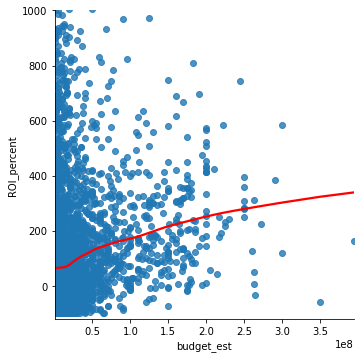

In [27]:
g1 = sns.lmplot(x='budget_est',y='ROI_percent',data=movie_collection,
           palette='viridis',truncate=False,line_kws = {'color':'red'},
           lowess = True);
g1.set(ylim=(-120,1000))

Let's also look at a scatter of our three most important categories.

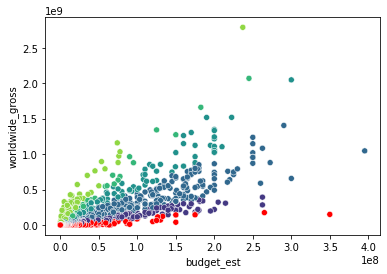

In [29]:
pal = sns.color_palette('viridis',5)
rgb_tuples = [(1,0,0)]
for color in pal:
    rgb_tuples.append(color)
new_pal = sns.color_palette(rgb_tuples)
sns.scatterplot(x='budget_est',y='worldwide_gross',data=movie_collection,
                hue='ROI_category',legend=False,
                hue_order = ['Not Profitable','Less Than 100%','100-400%','400-700%','700-1000%','Over 1000%'],
                palette=new_pal);

Let's get a better look at the distribution since the points are very overlapping.

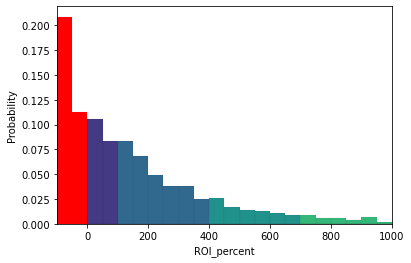

In [30]:
fig1,ax1 = plt.subplots()

sns.histplot(x='ROI_percent',data=movie_collection, ax=ax1, binwidth = 50,
             stat = 'probability', hue='ROI_category',alpha=1,edgecolor='black',
             hue_order = ['Not Profitable','Less Than 100%','100-400%','400-700%','700-1000%','Over 1000%'],
             palette=new_pal,legend=False);
ax1.set_xlim(-100,1000);

I'm seeing that there are a decent number of movies in the collection that did not make money. It may be useful to look at characteristics of these movies, but lets look at the set of profitable movies for now.

In [31]:
profitable_collection = movie_collection.loc[movie_collection.ROI_percent > 0]
profitable_collection = profitable_collection.reset_index()
profitable_collection = profitable_collection.drop(columns = 'index')

In [32]:
profitable_collection.head()

,tconst,Title,Genres,runtime_minutes,vote_average,vote_count,budget_est,worldwide_gross,release_week_day,release_day,...,Comedy,Thriller,Sport,Adventure,War,Fantasy,Western,primary_genre,budget_category,ROI_category
0,tt0892769,How to Train Your Dragon,"['Fantasy', 'Adventure', 'Animation', 'Family']",98,8.095082,618909,165000000.0,4.948749e+08,4,26,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,Action,Medium,100-400%
1,tt1228705,Iron Man 2,"['Adventure', 'Action', 'Science Fiction']",124,6.996308,670058,185000000.0,6.225449e+08,4,7,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Action,Medium,100-400%
2,tt1375666,Inception,"['Action', 'Science Fiction', 'Adventure']",148,8.794046,1863252,160000000.0,8.305287e+08,4,16,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Action,Medium,400-700%
3,tt0814255,Percy Jackson & the Olympians: The Lightning T...,"['Adventure', 'Fantasy', 'Family']",118,5.904995,169337,95000000.0,2.247740e+08,3,11,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,Action,Low,100-400%
4,tt0435761,Toy Story 3,"['Animation', 'Family', 'Comedy']",103,8.292754,690558,200000000.0,1.067925e+09,3,17,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Comedy,Medium,400-700%


In [33]:
profitable_collection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1605 entries, 0 to 1604
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tconst            1605 non-null   object 
 1   Title             1605 non-null   object 
 2   Genres            1605 non-null   object 
 3   runtime_minutes   1605 non-null   int64  
 4   vote_average      1605 non-null   float64
 5   vote_count        1605 non-null   int64  
 6   budget_est        1605 non-null   float64
 7   worldwide_gross   1605 non-null   float64
 8   release_week_day  1605 non-null   int64  
 9   release_day       1605 non-null   int64  
 10  release_month     1605 non-null   int64  
 11  release_year      1605 non-null   int64  
 12  ROI_percent       1605 non-null   float64
 13  Crime             1605 non-null   float64
 14  Mystery           1605 non-null   float64
 15  Animation         1605 non-null   float64
 16  Music             1605 non-null   float64


In [34]:
profitable_collection.groupby('ROI_category').count()

,tconst,Title,Genres,runtime_minutes,vote_average,vote_count,budget_est,worldwide_gross,release_week_day,release_day,...,Musical,Comedy,Thriller,Sport,Adventure,War,Fantasy,Western,primary_genre,budget_category
ROI_category,,,,,,,,,,,,,,,,,,,,,
100-400%,719,719,719,719,719,719,719,719,719,719,...,719,719,719,719,719,719,719,719,719,719
400-700%,215,215,215,215,215,215,215,215,215,215,...,215,215,215,215,215,215,215,215,215,215
700-1000%,82,82,82,82,82,82,82,82,82,82,...,82,82,82,82,82,82,82,82,82,82
Less Than 100%,449,449,449,449,449,449,449,449,449,449,...,449,449,449,449,449,449,449,449,449,449
Over 1000%,140,140,140,140,140,140,140,140,140,140,...,140,140,140,140,140,140,140,140,140,140


So, based on the above plots, there are a lot of movies that didn't do well, and it tails toward the successful end. From here onwards, I have decided to throw out the highest and lowest budget categories. The first, because it is a small sample size, and because Microsoft probably doesn't want to jump in with blockbuster budgets. The latter, because, while it is tempting seeing all the movies listed there with 1000% plus returns, there are equally as many that didn't make any money and many that lost much. Second, a movie in the lowest budget category needs to make ridiculous returns to come close to a higher budget movie making more standard returns. So, since we are interested in making movies in which he have reasonable confidence will be profitable, I want to look at the subset of the data that is in the low and medium budget range, and also the low and medium ROI range, since this is the biggest sample size of confidently successful movies we can achieve. Just to be safe, let's see if there is any difference in the distribution of ROI_percent for these two middle budget categories.

<bound method _AxesBase.set_ylim of <AxesSubplot:xlabel='ROI_percent', ylabel='Proportion'>>

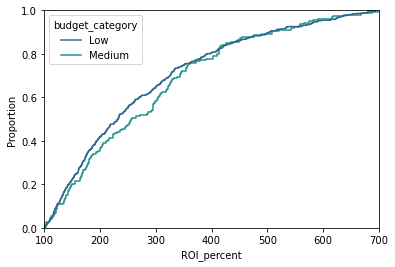

In [35]:
fig2, ax2 = plt.subplots()
sns.ecdfplot(data=profitable_collection.loc[((profitable_collection.budget_category == 'Medium')|
                                          (profitable_collection.budget_category == 'Low')) &
                                           ((profitable_collection.ROI_category == '100-400%')|
                                          (profitable_collection.ROI_category == '400-700%'))],
             x='ROI_percent',hue = 'budget_category',
            hue_order = ['Low','Medium'],palette=new_pal[2:4])
ax2.set_xlim(100,700)
ax2.set_ylim

They are basically the same. So, all plots moving forward will be from the budget categories 'Medium' and 'Low' and the ROI_percent categories '100-400%' and '400-700%'. Let's start looking at the other categorical variables. 

<AxesSubplot:xlabel='ROI_percent', ylabel='primary_genre'>

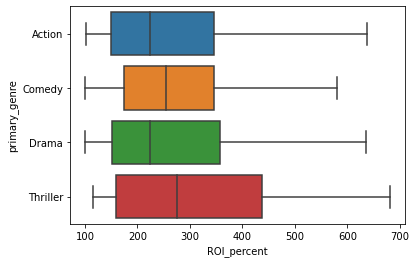

In [36]:
fig4, ax4 = plt.subplots()
sns.boxplot(data=profitable_collection.loc[((profitable_collection.budget_category == 'Medium')|
                                          (profitable_collection.budget_category == 'Low')) &
                                           ((profitable_collection.ROI_category == '100-400%')|
                                          (profitable_collection.ROI_category == '400-700%'))],
            y='primary_genre',x='ROI_percent',palette='tab10',showfliers=False,
           order = ['Action','Comedy','Drama','Thriller'])

Genre seems to matter slightly, could make a recommendation here.

<AxesSubplot:xlabel='vote_average', ylabel='primary_genre'>

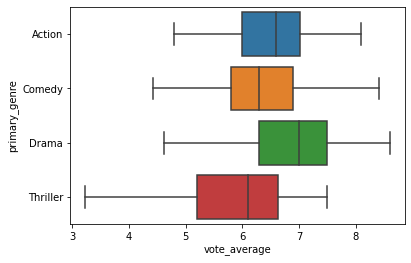

In [37]:
fig6, ax6 = plt.subplots()
sns.boxplot(data=profitable_collection.loc[((profitable_collection.budget_category == 'Medium')|
                                          (profitable_collection.budget_category == 'Low')) &
                                           ((profitable_collection.ROI_category == '100-400%')|
                                          (profitable_collection.ROI_category == '400-700%'))],
            y='primary_genre',x='vote_average',palette='tab10',showfliers=False,
           order = ['Action','Comedy','Drama','Thriller'])

Excellent, doesn't even need to be a good movie.

<AxesSubplot:xlabel='budget_category', ylabel='count'>

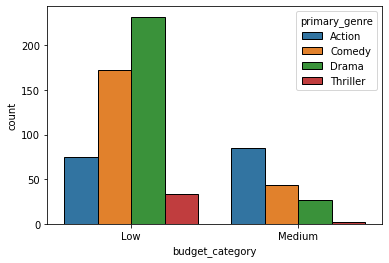

In [38]:
fig8, ax8 = plt.subplots()
sns.countplot(data=profitable_collection.loc[((profitable_collection.budget_category == 'Medium')|
                                          (profitable_collection.budget_category == 'Low')) &
                                           ((profitable_collection.ROI_category == '100-400%')|
                                          (profitable_collection.ROI_category == '400-700%'))],
              x='budget_category',hue='primary_genre', 
             hue_order = ['Action','Comedy','Drama','Thriller'],
             order = ['Low','Medium'],
             edgecolor='black')

And there aren't that many of them being produced! I noticed in the scatter matrices that there could be something to release day, month, year, etc. Lets look at release window.

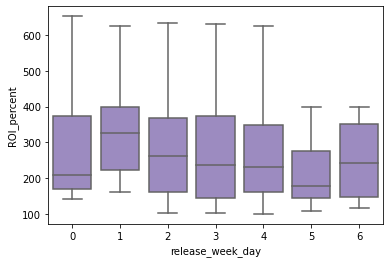

In [39]:
sns.boxplot(data=profitable_collection.loc[((profitable_collection.budget_category == 'Medium')|
                                          (profitable_collection.budget_category == 'Low')) &
                                           ((profitable_collection.ROI_category == '100-400%')|
                                          (profitable_collection.ROI_category == '400-700%'))],
            x='release_week_day',y='ROI_percent',showfliers = False,color='mediumpurple',saturation = .5);

Okay, release day I suppose is Monday!

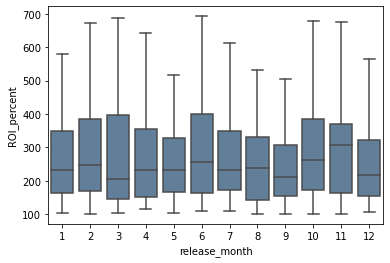

In [40]:
sns.boxplot(data=profitable_collection.loc[((profitable_collection.budget_category == 'Medium')|
                                          (profitable_collection.budget_category == 'Low')) &
                                           ((profitable_collection.ROI_category == '100-400%')|
                                          (profitable_collection.ROI_category == '400-700%'))],
            x='release_month',y='ROI_percent',showfliers = False,color='steelblue',saturation = .5);

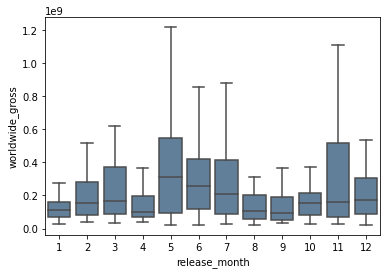

In [41]:
sns.boxplot(data=profitable_collection.loc[((profitable_collection.budget_category == 'Medium')|
                                          (profitable_collection.budget_category == 'Low')) &
                                           ((profitable_collection.ROI_category == '100-400%')|
                                          (profitable_collection.ROI_category == '400-700%'))],
            x='release_month',y='worldwide_gross',showfliers = False,color='steelblue',saturation = .5);

This one I think is worth showing both, to highlight the peaks in release windows in terms of release month.